In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style

In [67]:
df = pd.read_csv(r"C:\Users\Jithmi\Downloads\Group Assignment Data Set.csv")

In [68]:
df.columns = df.columns.str.strip()

In [69]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [70]:
df.isnull().sum()  / df.shape[0]

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64

In [71]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [72]:
df = df.dropna( how = 'all'  , axis = 'index'  )

In [73]:
# Group the data by gender and payment method and count the occurrences
grouped = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

# Pivot the table to make payment methods as columns and fill NaNs with 0
pivot_table = grouped.pivot(index='gender', columns='payment_method', values='count').fillna(0)

print(pivot_table)

payment_method   Cash  Credit Card  Debit Card
gender                                        
Female          26509        21011       11962
Male            17938        13920        8117


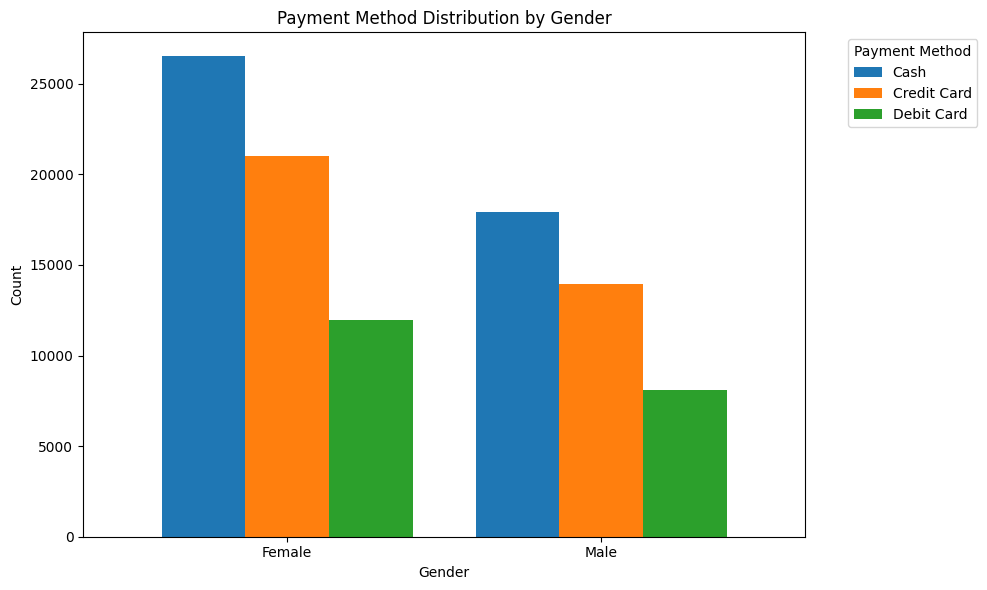

In [74]:
# Group the data by gender and payment method and count the occurrences
grouped = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

# Pivot the table to make payment methods as columns and fill NaNs with 0
pivot_table = grouped.pivot(index='gender', columns='payment_method', values='count').fillna(0)

# Create a column chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=plt.gca(), width=0.8)

# Set chart properties
plt.title('Payment Method Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(range(len(pivot_table.index)), pivot_table.index, rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the chart
plt.show()





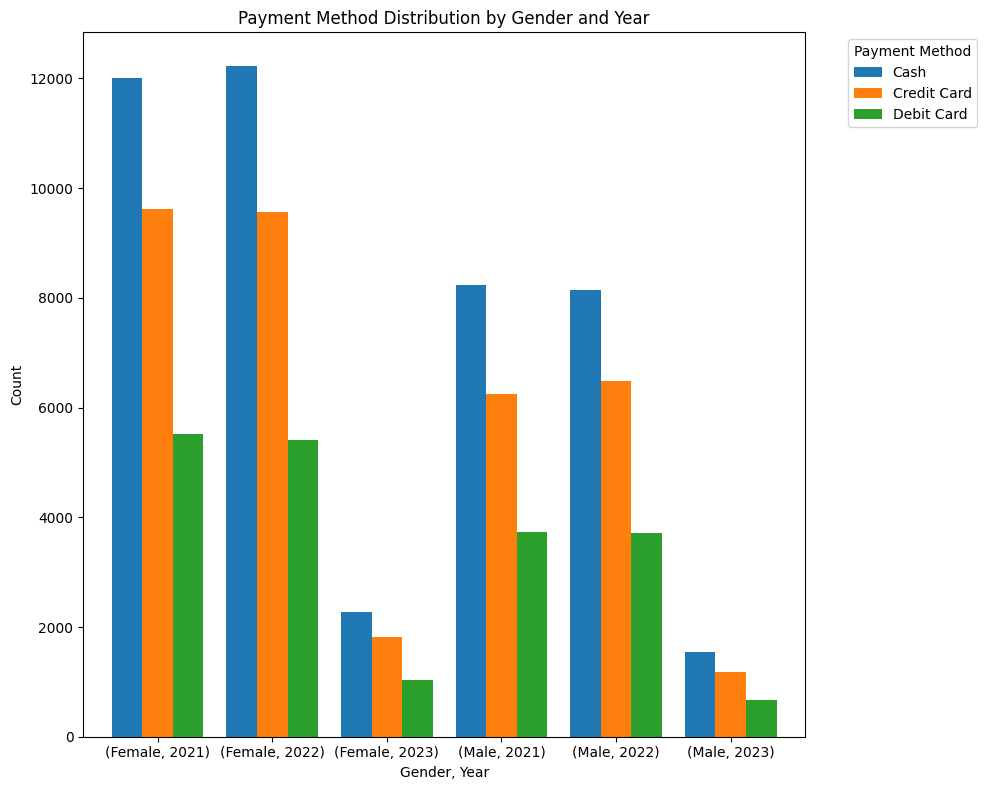

In [75]:
df['year'] = df['invoice_date'].dt.year

# Specify the order of years
year_order = [2021, 2022, 2023]

# Group the data by gender, year, and payment method, and count the occurrences
grouped = df.groupby(['gender', 'year', 'payment_method']).size().reset_index(name='count')

# Pivot the table to make payment methods as columns and fill NaNs with 0
pivot_table = grouped.pivot_table(index=['gender', 'year'], columns='payment_method', values='count', fill_value=0)

# Reorder the rows based on the year_order list
pivot_table = pivot_table.reindex(year_order, level='year')

# Create a column chart
plt.figure(figsize=(10, 8))
pivot_table.plot(kind='bar', ax=plt.gca(), width=0.8)

# Set chart properties
plt.title('Payment Method Distribution by Gender and Year')
plt.xlabel('Gender, Year')
plt.ylabel('Count')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
# Show the chart

In [76]:
# Convert invoice_date column to pandas datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract the year from the invoice_date column
df['year'] = df['invoice_date'].dt.year

# Calculate the total sales for each row
df['total_sales'] = df['quantity'] * df['price']

# Group by year and payment_method and calculate the total sales for each group
result = df.groupby(['year', 'payment_method'])['total_sales'].sum().reset_index()

# Calculate the total sales for each year to calculate percentage later
total_sales_by_year = df.groupby('year')['total_sales'].sum().reset_index()
total_sales_by_year.rename(columns={'total_sales': 'total_sales_by_year'}, inplace=True)

# Merge the total sales by year into the result DataFrame
result = result.merge(total_sales_by_year, on='year', how='left')

# Calculate the percentage of total sales for each payment method in each year
result['percentage'] = (result['total_sales'] / result['total_sales_by_year']) * 100

# Round off the percentage to two decimals
result['percentage'] = result['percentage'].round(2)

# Drop the total_sales_by_year column if you don't need it in the final result
result.drop(columns='total_sales_by_year', inplace=True)

print(result)


   year payment_method  total_sales  percentage
0  2021           Cash  51433379.13       44.90
1  2021    Credit Card  40338755.25       35.21
2  2021     Debit Card  22788436.21       19.89
3  2022           Cash  51697544.18       44.78
4  2022    Credit Card  40275865.45       34.89
5  2022     Debit Card  23463404.45       20.33
6  2023           Cash   9701319.71       45.10
7  2023    Credit Card   7462503.07       34.70
8  2023     Debit Card   4344586.80       20.20


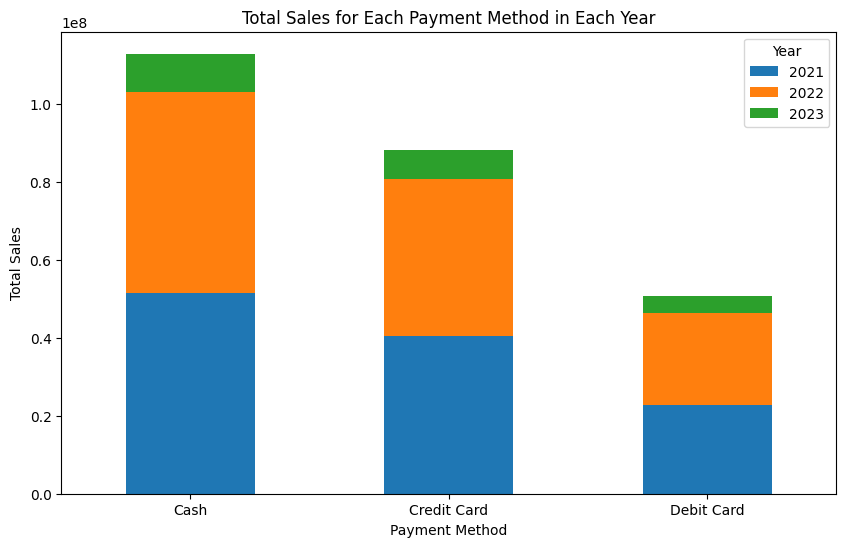

In [77]:
# Convert invoice_date column to pandas datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract the year from the invoice_date column
df['year'] = df['invoice_date'].dt.year

# Calculate the total sales for each row
df['total_sales'] = df['quantity'] * df['price']

# Group by year and payment_method and calculate the total sales for each group
result = df.groupby(['year', 'payment_method'])['total_sales'].sum().reset_index()

# Calculate the total sales for each year to calculate percentage later
total_sales_by_year = df.groupby('year')['total_sales'].sum().reset_index()
total_sales_by_year.rename(columns={'total_sales': 'total_sales_by_year'}, inplace=True)

# Merge the total sales by year into the result DataFrame
result = result.merge(total_sales_by_year, on='year', how='left')

# Calculate the percentage of total sales for each payment method in each year
result['percentage'] = (result['total_sales'] / result['total_sales_by_year']) * 100

# Round off the percentage to two decimals
result['percentage'] = result['percentage'].round(2)

# Drop the total_sales_by_year column if you don't need it in the final result
result.drop(columns='total_sales_by_year', inplace=True)

# Pivot the DataFrame to have years as columns and payment methods as index
pivot_df = result.pivot(index='payment_method', columns='year', values='total_sales')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Payment Method in Each Year')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

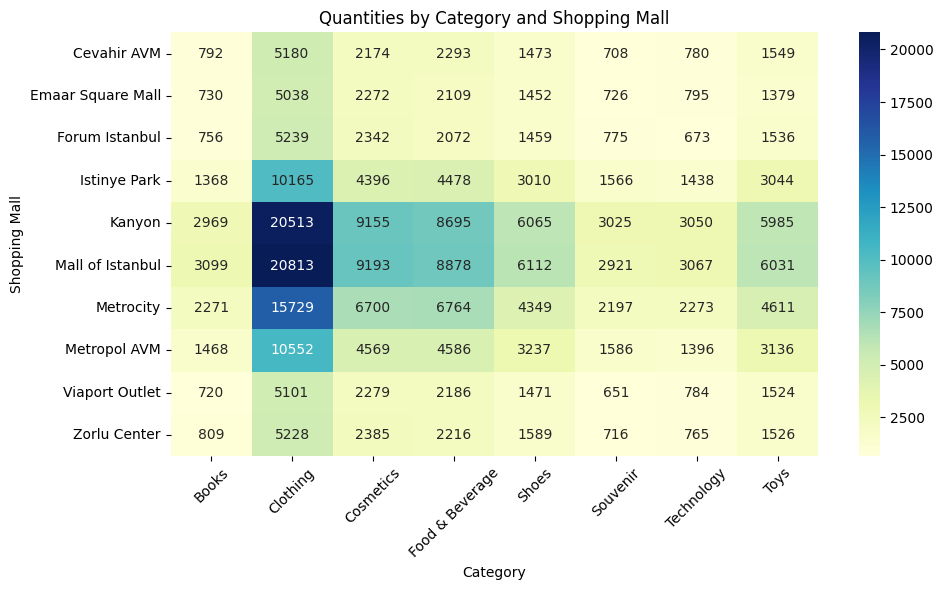

In [78]:
# Group the data by shopping mall and category, and sum the quantities sold in each group
mall_category_quantities = df.groupby(['shopping_mall', 'category'])['quantity'].sum().reset_index()

# Pivot the data to create a pivot table for the heatmap
pivot_table = mall_category_quantities.pivot_table(index='shopping_mall', columns='category', values='quantity', aggfunc='sum')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Quantities by Category and Shopping Mall')
plt.xlabel('Category')
plt.ylabel('Shopping Mall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


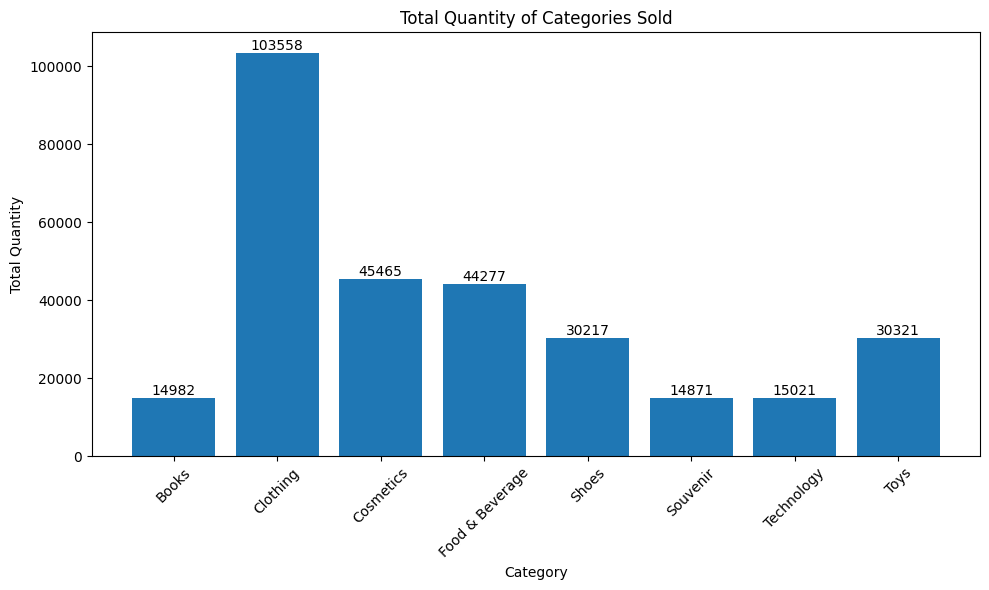

In [84]:
# Group the data by category and sum the quantities sold in each category
category_quantities = df.groupby('category')['quantity'].sum().reset_index()

# Create a column chart (vertical bar chart)
plt.figure(figsize=(10, 6))
plt.bar(category_quantities['category'], category_quantities['quantity'])

# Add labels to the columns
for i, value in enumerate(category_quantities['quantity']):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

plt.title('Total Quantity of Categories Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


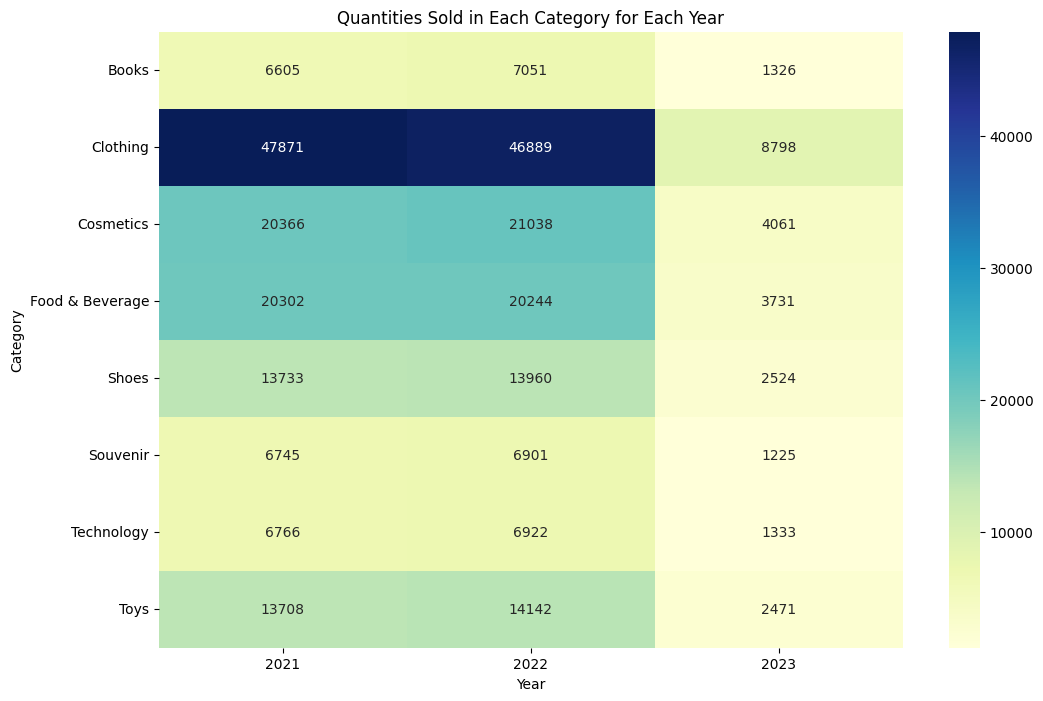

In [56]:

# Extract year from the invoice_date column
df['year'] = df['invoice_date'].dt.year

# Group the data by year, category, and sum the quantities sold in each category for each year
category_year_quantities = df.groupby(['year', 'category'])['quantity'].sum().reset_index()

# Pivot the data to create a pivot table for the heatmap
pivot_table = category_year_quantities.pivot_table(index='category', columns='year', values='quantity', aggfunc='sum')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Quantities Sold in Each Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()

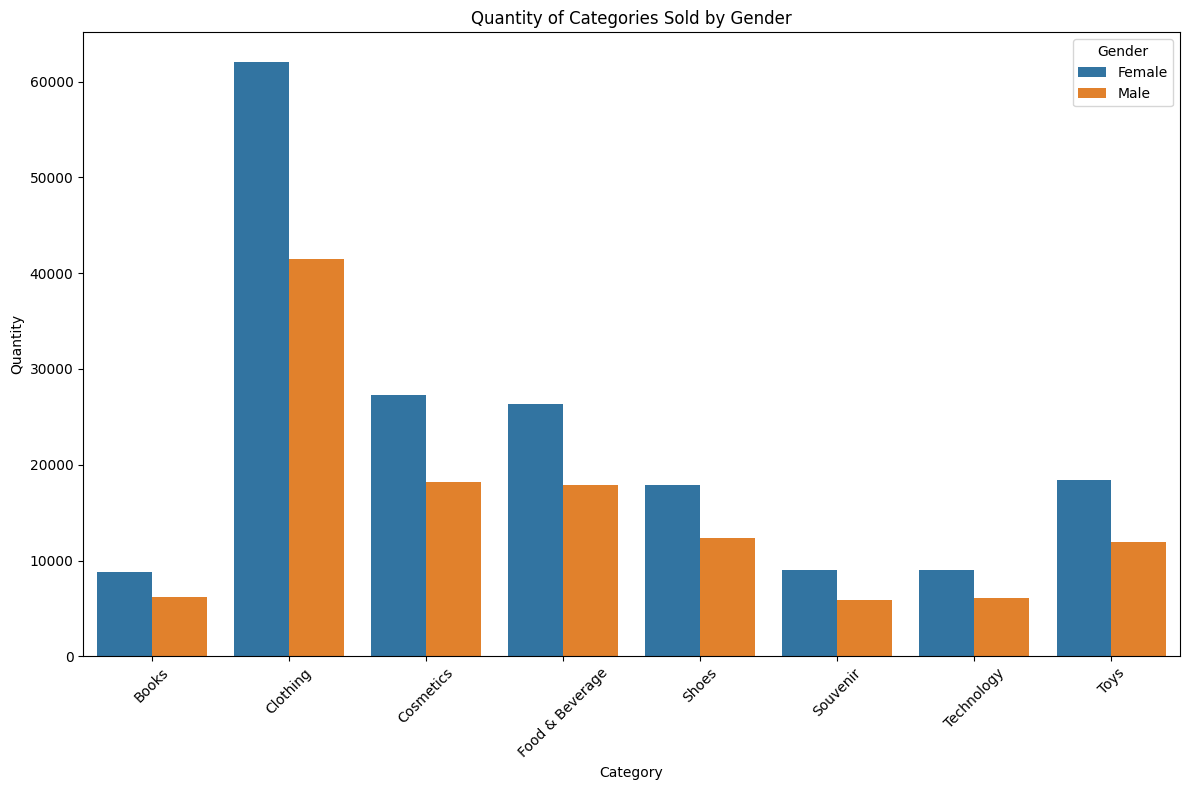

In [57]:

# Group the data by gender and category, and sum the quantities sold in each group
gender_category_quantities = df.groupby(['gender', 'category'])['quantity'].sum().reset_index()

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='quantity', hue='gender', data=gender_category_quantities)
plt.title('Quantity of Categories Sold by Gender')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
